In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
##bisa dipahami

<function matplotlib.pyplot.show(close=None, block=None)>

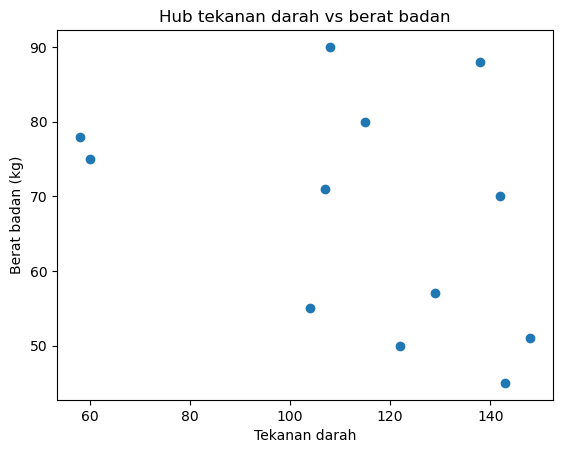

In [2]:
# membaca dataset
path = r"C:\Users\ADVAN\pkb\data_tekanan_darah_fix.csv" # menyimpan lokasi file CSV ke dalam variabel path.
# Huruf r di depan tanda kutip berarti “raw string”, artinya Python tidak akan menganggap tanda \ sebagai karakter khusus.

df = pd.read_csv(path, sep= ",") #membaca file CSV yang ada di alamat path menggunakan pandas (pd).
# pd.read_csv() = fungsi untuk membuka file .csv dan menyimpannya dalam bentuk DataFrame (tabel seperti di Excel).
# sep="," = pemisah antar kolom di file adalah koma ,


# df = df.rename(columns={
#     "Tinggi(cm)": "Tinggi",
#     "Berat(kg)": "Berat"
# })

# Visual dataset
plt.scatter(df['TEKANAN_DARAH'],df['BERAT_BADAN']) #Ini membuat grafik sebar (scatter plot) dari data:
# Sumbu X (horizontal) = nilai dari kolom TEKANAN_DARAH
# Sumbu Y (vertikal) = nilai dari kolom BERAT_BADAN


plt.title('Hub tekanan darah vs berat badan')
plt.xlabel('Tekanan darah')
plt.ylabel('Berat badan (kg)')
plt.show

# digunakan untuk menampilkan hubungan antara tekanan darah dan berat badan dalam bentuk grafik titik (scatter plot).

In [3]:
#eksperimen daong
df= pd.read_csv(r"C:\Users\ADVAN\pkb\data_tekanan_darah_fix.csv")
print(df.columns)
df

Index(['NAMA', 'TEKANAN_DARAH', 'BERAT_BADAN'], dtype='object')


,NAMA,TEKANAN_DARAH,BERAT_BADAN
0,AIDA,129,57.0
1,ARIEF,115,80.0
2,ADI,60,75.0
3,JASMINE,58,78.0
4,LAELA,122,50.0
5,FIRDAUS,142,70.0
6,INSAN,148,51.0
7,HUSNI,143,45.0
8,FAQIH,108,90.0
9,DWI,138,88.0


In [4]:
df = df.dropna(subset= ['TEKANAN_DARAH', 'BERAT_BADAN'])
# Clustering dengan K-Means
km = KMeans(n_clusters=4, random_state=42)#melakukan pengelompokkan data menjadi 4 kelempok
y_predicted = km.fit_predict(df[['TEKANAN_DARAH', 'BERAT_BADAN']])
# penambahan kolom "Cluster" untuk menampilkan hasil klaster setiap data 
df['cluster'] = y_predicted

df.head()
print(df)
# menampilkan nilai centrouid
print(km.cluster_centers_)

       NAMA  TEKANAN_DARAH  BERAT_BADAN  cluster
0      AIDA            129         57.0        0
1     ARIEF            115         80.0        2
2       ADI             60         75.0        1
3   JASMINE             58         78.0        1
4     LAELA            122         50.0        0
5   FIRDAUS            142         70.0        3
6     INSAN            148         51.0        3
7     HUSNI            143         45.0        3
8     FAQIH            108         90.0        2
9       DWI            138         88.0        2
10    RIZKI            107         71.0        2
11   EFENDI            104         55.0        0
[[118.33333333  54.        ]
 [ 59.          76.5       ]
 [117.          82.25      ]
 [144.33333333  55.33333333]]


c:\Users\ADVAN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ADVAN\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ADVAN\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADVAN\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [5]:
# pembenaran dari langkah ke 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Baca data
path = r"C:\Users\ADVAN\pkb\data_tekanan_darah_fix.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip()  # hapus spasi header

# Pastikan kolom angka & tanpa missing value
df = df.dropna(subset=['TEKANAN_DARAH', 'BERAT_BADAN'])

# Clustering
km = KMeans(n_clusters=4, random_state=42)
y_predicted = km.fit_predict(df[['TEKANAN_DARAH', 'BERAT_BADAN']])
df['cluster'] = y_predicted

# Tampilkan hasil
print(df.head())
print("\nCluster Centers:")
print(km.cluster_centers_)


      NAMA  TEKANAN_DARAH  BERAT_BADAN  cluster
0     AIDA            129         57.0        0
1    ARIEF            115         80.0        2
2      ADI             60         75.0        1
3  JASMINE             58         78.0        1
4    LAELA            122         50.0        0

Cluster Centers:
[[118.33333333  54.        ]
 [ 59.          76.5       ]
 [117.          82.25      ]
 [144.33333333  55.33333333]]


c:\Users\ADVAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

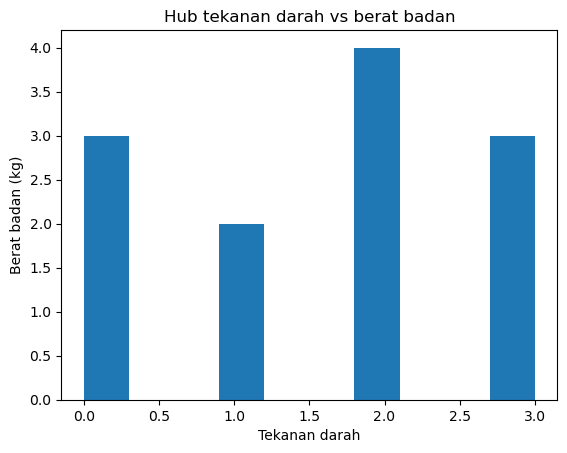

In [6]:
# menampilkan histogram cluster
plt.hist(df['cluster'])
plt.title('Hub tekanan darah vs berat badan')
plt.xlabel('Tekanan darah')
plt.ylabel('Berat badan (kg)')
plt.show

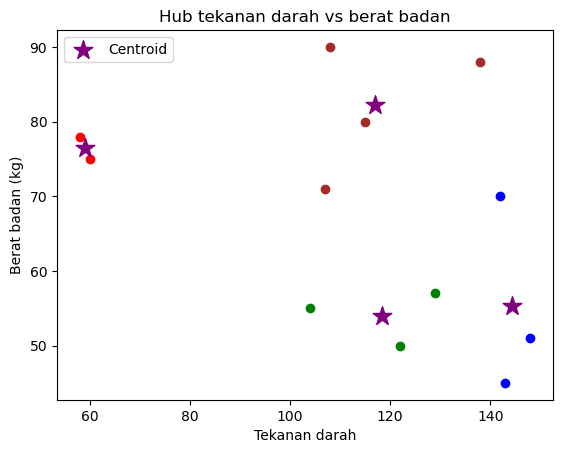

In [8]:
# visualisasi hasil clustering dengan scatter plot 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.title('Hub tekanan darah vs berat badan')
plt.xlabel('Tekanan darah')
plt.ylabel('Berat badan (kg)')
plt.scatter(df1['TEKANAN_DARAH'],df1['BERAT_BADAN'] ,color = "green")
plt.scatter(df2['TEKANAN_DARAH'],df2['BERAT_BADAN'] ,color = "red")
plt.scatter(df3['TEKANAN_DARAH'],df3['BERAT_BADAN'] ,color = "brown")
plt.scatter(df4['TEKANAN_DARAH'],df4['BERAT_BADAN'] ,color = "blue")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker= "*", s=200, label= 'Centroid')

plt.legend()
plt.show()